<img align="center" src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="800px"/>
<figure>
<a id='fig_ref'></a>
<img src="../Images/Logo_TalentQ_Azul.png" align=center width='200px'/>
</figure>
<br>
<br>



<table width="100%"><td style=" font_style:italic; font-size:50px;text-align:center;background-color:rgba(0, 220, 170,0.7)">
<div>
Aleatoriedad Cuántica
</div>
</td></table>

<figure>
<a id='fig_ref'></a>
<img src="../Images/numbers.jpg" align=center width='800px'/>
</figure>



Abril 2024

Autores:

* Juan Santos
* Sebastian V. Romero 
* Irais Bautista
* Constantino Rodríguez
* Javier Mas


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Licencia: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}}$ 
$ \newcommand{\Hil}{{\mathbb H}}$
$ \newcommand{\bemat}{\begin{matrix}} $
$ \newcommand{\enmat}{\end{matrix}} $

In [1]:
import numpy as np
import qibo
from qibo import  gates
from qibo.models import Circuit

# Introducción


La Mecánica Cuántica afirma que los resultados de una medida son *intrínsecamente aleatorios*.

Es un punto de vista radicalmente distinto al de la Mecánica Clásica, que es determinista. Ahí, la aleatoriedad tiene su origen en la *imprecisión* en el conocimiento de las condiciones iniciales de un experimento. 

En este cuaderno, vamos a ver cómo se puede obtener un recurso computacional de la **aleatoriedad  cuántica**.

# Generador clásico  pseudo-aleatorio

En esta sección vamos a crear un generador aleatorio clásico *rudimentario*. Se trata de una función que arroja números sucesivos realizando una simple operación matemática sobre uno para generar el siguiente. En cierto modo es igual que un mecanismo compuesto de ruedas y palancas que saltan y, por tanto, impredecible de puro complicado. En este principio se basaba la máquina [Enigma](https://es.wikipedia.org/wiki/Enigma_(m%C3%A1quina)), que se usó para encriptar mensajes en la 2ª guerra mundial.  

<figure><center>
<a id='fig_ref'></a>
<img src="../Images/GNA_clasico.png" align=center width='450px'/>
</center></figure>


Concretamente <u>vamos a programar un [generador lineal congurencial](https://es.wikipedia.org/wiki/Generador_lineal_congruencial)</u>. Esta función, a partir de un primer número $s_0\in [0,1]$, devuelve $s_1$ dado por la expresión siguiente: 

$$
s_1 = \big((a\cdot s_0) \, \hbox{mod} \, m\big) /m
$$ 


 A partir de $s_1$ podemos volver a usar la misma función para obtener $s_2$ y así, sucesivamente $s_3, s_4,... $ cada uno a partir del anterior.

Observa que, por construcción, sólo puede haber $m$ números distintos $s_i$ en el intervalo $[0,1]$ que son los *posibles restos* de la división $a\cdot s$ entre $m$. Así que, como mínimo, al cabo de $m$ iteraciones tendrán que repetirse la serie. De hecho, dependiendo de los valores relativos de $s_0, a$ y $m$, puede haber ciclos que aparezcan mucho antes.  


En el código a continuación la <u>variable global *seed*</u> será la que asuma los valores $s_0 \to s_1\to s_2\to ...$



In [2]:
'este es el primer valor s0'
seed = 0.7

def rn_gen_clasico(N=1):
    'Generador de N números pseudo aleatorios'
    global seed
    if seed == 0 : seed=1  # Esto es un truco para evitar quedarnos atascados si seed=0
    random_numbers = np.zeros(N)
    'ahora generamos s(i+1) a partir de s(i)  N veces'
    for i in range(N):
        seed = (a*seed  % m)/m
        random_numbers[i] = seed
    return random_numbers    

Ahora puedes generar tus propios números aleatorios. Corre la siguiente celda varias veces y observa el resultado.

In [3]:
'Estos parámetros son modificables'
'**********************************'
a = 2000
n = 5 # vamos a escribir m = 2**(2*n) para "comparar" con el caso cuántico con 2n cúbits
m = 2**(2*n)
'**********************************'

rn_gen_clasico()[0]

0.3671875

Ahora ya podemos crear una lista de 1000 números pseudo-aleatorios $s_i \in [0,1]$ y representar sus valores

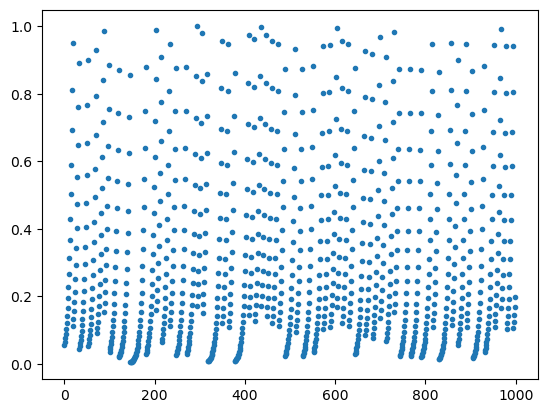

In [4]:
'Estos parámetros son modificables'
'**********************************'
a = 1200
n = 5
m = 2**(2*n)
seed = 0.9
'**********************************'

numeros_lista = list(range(1000))
rn_clasicos_lista = rn_gen_clasico(N=1000)

'Hacemos la gráfica'
import matplotlib.pyplot as plt
plt.plot(numeros_lista ,rn_clasicos_lista,'.')

Puede parecer que los números son totalmente aleatorios. Sin embargo esto no es así. Dependiendo de los valores que demos a  $a$ y a $m$ hay periodicidades en la función modular que introducen correlaciones. En este histograma podemos ver la frecuencia relativa de aparición de cada número y veremos que no es uniforme, en general.

(array([235., 211., 137., 105.,  69.,  67.,  55.,  38.,  49.,  34.]),
 array([0.00400006, 0.10356488, 0.20312969, 0.30269451, 0.40225932,
        0.50182414, 0.60138895, 0.70095377, 0.80051858, 0.9000834 ,
        0.99964821]),
 <BarContainer object of 10 artists>)

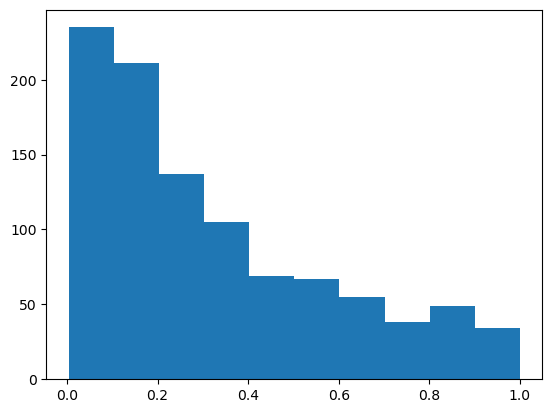

In [5]:
plt.hist(rn_clasicos_lista)

<div class="alert alert-block alert-success">
<b>¡A jugar!</b>:   modifica los parámetros $a$ y $n$ y observa si aparecen patrones en la distribución de puntos, así como la estadística de resultados en el histograma
</div>


# Montecarlo 

Una de las utilidades más frecuentes de la generación de números aleatorios se encuentra en el método Montecarlo. 
Vamos a ilustrar este método con un clásico: 

<center>
<b>Objetivo:</b> obtener el número $\pi$ con la mayor precisión posible
</center>
<br>

Para ello pensaremos en un cuadrado $A$,  de 1 metro de lado, es decir, de area $S_A = 1$  en el plano. En su interior inscribiremos un cuarto de circunferencia. El área interior a la circunferencia es $S_R = \pi/4$. 
Si conseguimos calcular el área $S_R$, obtener $\pi$ no es más que despejar.


<figure><center>
<a id='fig_ref'></a>
<img src="../Images/semicirculo.png" align=center width='300px'/>
</center></figure>

La idea es lanzar $N_A$ puntos de forma aleatoria sobre el area $A$ del cuadrado. 
El area de la subregión  y el area del dominio total estarán en la misma proporción que el número de puntos que caen dentro del círculo, $N_C$, sobre el total de puntos, $N_A$

$$
\frac{N_C}{N_A} \approx \frac{S_C}{S_A}
$$

Si la longitud del lado es $1$ el area del cuadrado será  $S_A = 1$  y el del cuadrante de circunferencia $S_R = \pi/4$. De aquí obtenemos una forma de *aproximar*  el número $\pi$



$$
\pi \approx 4 \frac{N_C}{N_{A}}
$$


Para aumentar la precisión en esta aproximación  es necesario

- aumentar el número total de puntos $N = N_A + N_C \gg 1$

- que las variables  $x$ e $y$ estén *uniformemente distribuidas*  y  sean *realmente aleatorias*

Este último aspecto, la *independencia aleatoria* de los puntos es el que sólo podemos aproximar cuando usamos generadores pseudo-aleatorios. 

La siguiente función *MonteCarlo* llama a un *generador* para crear una lista de N coordenadas $(x_i,y_i)$ aleatorias y mirar si caen dentro del círculo $x^2 + y^2 = 1$ o no. Cada vez que sí cae dentro añade 1 al contador NC

In [6]:
'función para generar el Montecarlo del cuarto de círculo'
def MonteCarlo(N, generador):
    global seed, x_list, y_list, dentro, fuera

    ' el número total de puntos sobre el cuadrado'
    NA = N
    ' la variable que va acumulando +1 cada vez que un punto cae dentro del círculo'
    NC = 0

    'metodo 1 para obtener las coordenadas x e y'
    rn_list = generador(2*N)
    x_list = rn_list[:N]
    y_list = rn_list[N:]

    'metodo 2 para obtener las coordenadas x e y'
    #rn_list = generador(2*N) # las entradas pares
    #x_list = rn_list[::2]  # las entradas pares serán las x_i
    #y_list = rn_list[1::2] # las entradas impares serán las y_i

    'Contamos cuántos de los puntos están dentro del circulo de radio 1'
    d = x_list**2+y_list**2
    dentro = d<=1
    fuera = d>1
    NC = np.sum(dentro)
    ratio = NC/NA 
    
    return 4*ratio

'función para graficar los puntos generados por el MonteCarlo'
def grafica_de_puntos():
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    ax.plot(x_list[dentro], y_list[dentro], 'go', label='Puntos dentro del círculo: %i' % np.sum(dentro), markersize=1)
    ax.plot(x_list[fuera], y_list[fuera], 'ro', label='Puntos fuera del círculo: %i' % np.sum(fuera), markersize=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    x_circle = np.linspace(0, 1, 1000)
    ax.plot(x_circle, np.sqrt(1-x_circle*x_circle), 'k')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()
    plt.show()

Ya podemos ejecutar  y calcular una estimación de $\pi$ usando el *generador* rudimentario *rn_gen_clasico*

El valor estimado de pi es 3.8016
El valor exacto de pi es 3.141592653589793


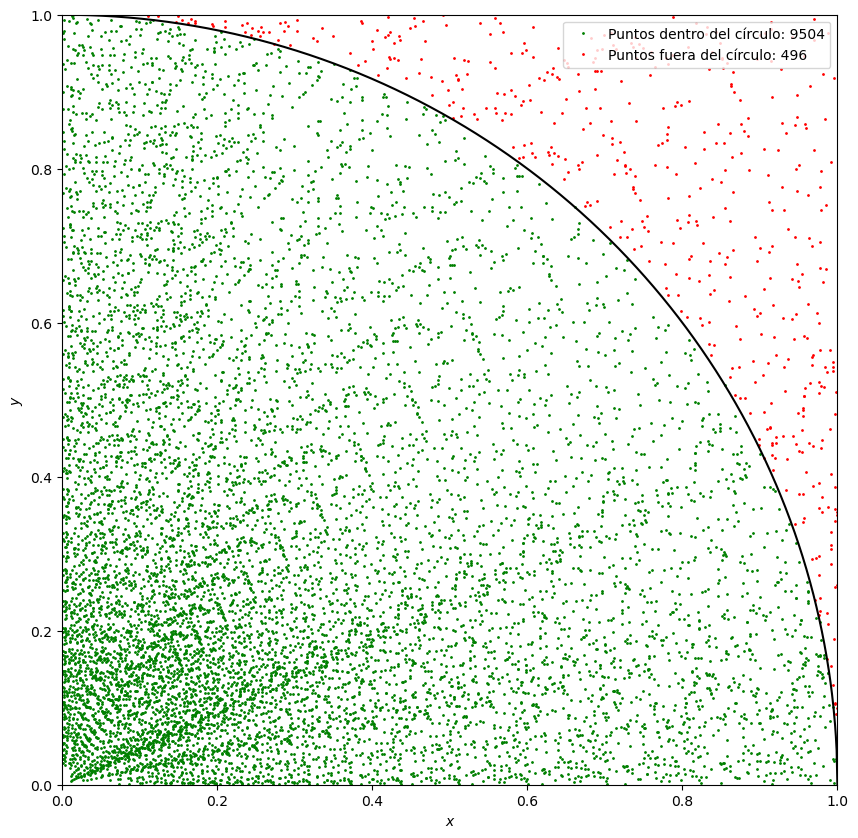

In [7]:
N  = 10000 # Número de puntos
a = 1200   # valor de a
n = 5
m = 2**(2*n) # valor de m equivalente a numeros binarios de 2n bits

pi_value = MonteCarlo(N, rn_gen_clasico)


print(f'El valor estimado de pi es {pi_value}')
print(f'El valor exacto de pi es {np.pi}')

grafica_de_puntos()

<div class="alert alert-block alert-success">
<b>¡A jugar!</b>:  cambia los parámetro $a$ y $n$ observa las correlaciones tan misteriosas que pasaban inadvertidas. Cambia al método 2 dentro de la función comentando y descomentando líneas. Observa el resultado.
</div>


Vamos a ejecutar el MonteCarlo  **100 veces** para distintos números $N$ de puntos y un generador de números aleatorio fijo. La media de los 100 resultados nos dará una estimación de la *calidad de nuestro generador* 


In [8]:
pi_100_puntos   = [MonteCarlo(100, rn_gen_clasico) for i in range(100)]
print('La media de pi con N=100 puntos    es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_100_puntos), np.std(pi_100_puntos)))

pi_1000_puntos  = [MonteCarlo(1000, rn_gen_clasico) for i in range(100)]
print('La media de pi con N=1000 puntos   es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_1000_puntos), np.std(pi_1000_puntos)))

pi_10000_puntos = [MonteCarlo(10000, rn_gen_clasico) for i in range(100)]
print('La media de pi con N=10000  puntos es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_10000_puntos), np.std(pi_10000_puntos)))

pi_100000_puntos = [MonteCarlo(int(1e5), rn_gen_clasico) for i in range(100)]
print('La media de pi con N=100000 puntos es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_100000_puntos), np.std(pi_100000_puntos)))

La media de pi con N=100 puntos    es 3.8000 y su desviación típica 0.0852.
La media de pi con N=1000 puntos   es 3.7983 y su desviación típica 0.0260.
La media de pi con N=10000  puntos es 3.7998 y su desviación típica 0.0090.
La media de pi con N=100000 puntos es 3.8004 y su desviación típica 0.0024.


Podemos graficar los histogramas de los distintos experimentos para ver cómo la desviación cambia con $N$, pero la media no

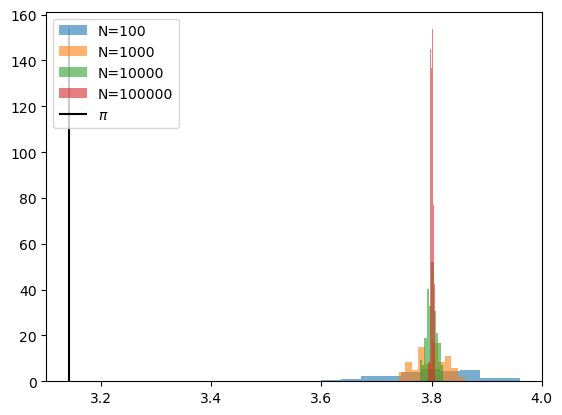

In [9]:
hist = plt.hist(pi_100_puntos,   density=True, alpha = 0.6, label='N=%i' % 100)
hist = plt.hist(pi_1000_puntos,  density=True, alpha = 0.6, label='N=%i' % 1000)
hist = plt.hist(pi_10000_puntos, density=True, alpha = 0.6, label='N=%i' % 10000)
hist = plt.hist(pi_100000_puntos, density=True, alpha = 0.6, label='N=%i' % 100000)

plt.vlines(np.pi, 0, np.max(hist[0]), 'k', label =r'$\pi$')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>¡A jugar!</b>: Fija  $N$=10000 puntos. Vuelve a cambiar los parámetro $a$ y $n$ y busca los valores que te den la mejor aproximación en valor medio a $\pi$. Anota también la desviación típica.   
</div>

# Números aleatorios mediante Computación Cuántica

 Vamos a atacar el mismo problema ahora, pero utilizaremos la mecánica cuántica para generar nuestros números aleatorios. Lo haremos de dos maneras. Primeramente, vamos a programar un ordenador cuántico. Posteriormente usaremos un generador específico para hacerlo.


<figure><center>
<a id='fig_ref'></a>
<img src="../Images/GNA_quantum.webp" align=center width='300px'/>
</center></figure>


## Circuito Cuántico

Vamos a aprovechar que [Quantum Spain](https://quantumspain-project.es/en/quantum-spain/) ha puesto a disposición pública un ordenador cuántico de 5 qúbits en el Barcelona Supercomputing Center. Intentaremos sacar  partido de esta máquina.

### Explicación Teórica

Como ya sabrás, actuando sobre un sólo cúbit, la puerta de Hadamard construye una *superposición equilibrada* de los estados $\ket{0}$ y $\ket{1}$

$$
\ket{0} ~~\rightarrow ~~ H  \ket{0} ~= ~ \ket{+} = \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big) $$

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: center ;color: navy;">  
 $\Rightarrow$ <b> con idéntica probabilidad</b>, $1/2$,  una medida del estado $\ket{+}$  resultará en valores $0$ ó $1$  
</p></div>

La estrategia será la siguiente: vamos a programar nuestro ordenador de manera que 

- **inicialmente** los  $n$ cúbits de nuestro ordenador  estén en el estado $\ket{0}\ket{0}...\ket{0} = \ket{00...0}$.

- a continuación, **aplicaremos la puerta de Hadamard** sobre cada uno de ellos  obteniendo así la superposición $\ket{+}\ket{+}...\ket{+} = \ket{++...+}$  
<br>
Por ejemplo, supongamos que $n=3$. Entonces, el estado a la salida del circuito será
<br>    
$$
\begin{array}{rcl}
H^{\otimes 3}\ket{000} ~~=~~ H\ket{0} H\ket{0} H\ket{0} ~~=~~ \ket{+++} &=&\displaystyle \frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big)\frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big)\frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big) \\
&=&\displaystyle \frac{1}{2^{3/2}}\big(
\ket{000} + \ket{001} + \ket{010} + \ket{011} + \ket{100} + \ket{101} + \ket{110} + \ket{111}  \big)
\end{array}
$$
<br>    
- finalmente **realizaremos medidas**  en todos los cúbits, colapsando la función de onda <b>de cada cúbit</b> bien a $\ket{0}$ ó a $\ket{1}$ con igual probabilidad $1/2$.

Vamos a programar este circuito en el lenguaje de programación [QIBO](https://qibo.science/)

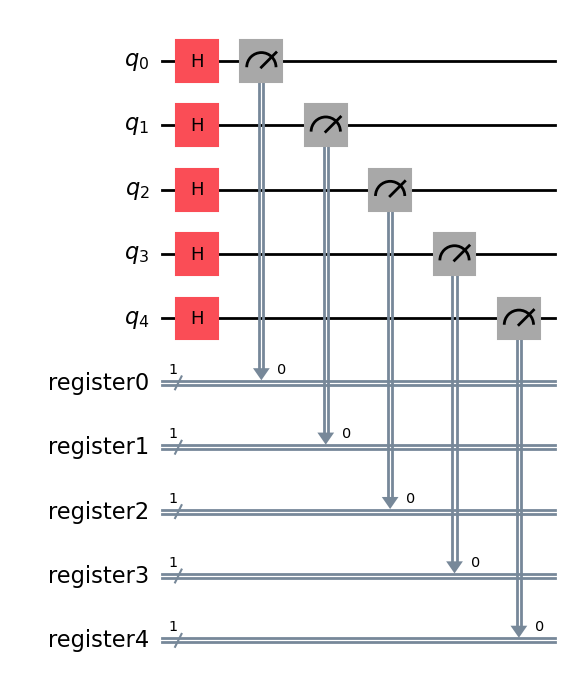

In [10]:
'fabricamos el  circuito en Qibo'
num_qubits = 5
qc_rng = Circuit(num_qubits)
for i in range(num_qubits):
    'añadimos las puertas de Hadamard'
    qc_rng.add(gates.H(i))
    'añadimos los aparatos de medida'
    qc_rng.add(gates.M(i))


'dibujamos el circuito usando qiskit'
def draw_qibo_circuit_mpl(qcircuit):
    from qiskit import QuantumCircuit
    return QuantumCircuit.from_qasm_str(qcircuit.to_qasm()).draw('mpl',style='iqp')
    
draw_qibo_circuit_mpl(qc_rng)


Vamos a ejecutar el circuito ¡en un **ordenador cuántico** de verdad!

### Generación de números aleatorios mediante en el ordenador cuántico de Quantum Spain

Primero importamos algunas librerías necesarias para la ejecución

In [11]:
'Importamos algunas librerias básicas'
from qiboconnection.api import API
from qiboconnection.connection import ConnectionConfiguration

'Introducimos el usuario y la api_key'
configuration = ConnectionConfiguration(username = "user.quantumday",api_key = "apikey.quantumday")
api = API( configuration = configuration)

'Aqui podemos ver el estado del chip, Galadriel Qblox rack'
#display(api.list_devices())

'Seleccionamos el chip'
api.select_device_id(device_id=9)

import time

In [ ]:
########## esta celda es SOLO ES PARA EL MONITOR.  ################
Nshots = 8000
Ngrupos = 20

jobId = api.execute(circuit=[qc_rng]*(2*Ngrupos),nshots = Nshots)
print('Se ha enviado el trabajo. Su ID es:', jobId[0])

'Monitorizamos la ejecución del trabajo'
result = api.get_results(job_ids=jobId)
while result[0]==None:
    time.sleep(20)
    #print('Tu trabajo esta en espera')
    result = api.get_results(job_ids=jobId)

Se ha enviado el trabajo. Su ID es: 11770


Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4
Your job with id 11770 is still pending. Job queue position: 4


Ahora ejecutar el circuito de 5 cúbits un número $2N$ de veces. La salida serán $2N$ números en binario de $5$-bits, del tipo: [01011, 00111, ...] .
Esto lo hacemos para poder empalmar de 2 en 2 y formar $N$ **números en binario de $10$-bits**, del tipo [0101100111, ...]

  ¡IMPORTANTE!: ESPERA A QUE EL TRABAJO SE COMPLETE. Mientras la celda esté con asterisco (trabajando) ¡NO PUEDES VOLVER HACER CLICK EN ELLA!

In [ ]:
'Enviamos a ejecución. Si se satura la cola: ¡intercambiar las líneas de jobID!'
Nshots = 8000
grupo = 0

jobId = [11312]  # Utilizar sólo si se satura la cola. No borrar los corchetes
#jobId = api.execute(circuit=[qc_rng]*2,nshots = Nshots)

print('Se ha enviado el trabajo. Su ID es:', jobId[0])

'Monitorizamos la ejecución del trabajo'
result = api.get_results(job_ids=jobId)
while result[0]==None:
    time.sleep(20)
    #print('Tu trabajo esta en espera')
    result = api.get_results(job_ids=jobId)

Ahora construimos el generador de números aleatorios *rn_gen_bsc* basado en el circuito cuántico

- primero llama a la función *recibir_datos* para leer la salida del trabajo
 
- después transformamos esta serie en números enteros en base diez: [359, ...].

- finalmente lo normalizamos por el valor más alto [0.35092, ...]


In [ ]:
'el generador aleatorio basado en el circuito'
def rn_gen_bsc(N=1,n=10,v=False):
    '''Genera N números de n bits en el ordenador cuántico de Barcelona
    Esta función está programada para que recoja los datos generados por el monitor asociados a un trabajo y a un grupo determinados.
    Si v=True, devolverá solo N números, en binario, decimal y normalizado.
    Si v=False, devolverá 2N números normalizados listos para usarse en el Montecarlo como coordenadas (x_i, y_i)''' 
    global jobId, grupo
    nq = qc_rng.nqubits
    
    result0 = api.get_results(job_ids=jobId)
    result = [result0[0][2*grupo], result0[0][2*grupo+1]]

    rn_binario = np.array([])
    rn_decimal = np.array([])
    rn_normalizado = np.array([])
    for k in range(2):
        samples=result[k]['samples']
        qk_mem=[]
        for i in range(len(samples)):
            ch=''
            for j in range(nq):
                ch+=str(samples[i][j])
            qk_mem.append(ch)
        resultado = np.reshape(qk_mem, (N//2, n//nq))
        rn_binario_temp = np.array([''.join(res) for res in resultado])
        ' pasamos de notación binaria a decimal '
        rn_decimal_temp = np.array([int(rn, 2) for rn in rn_binario_temp])
        rn_normalizado_temp = rn_decimal_temp/(2**(n)-1)

        rn_binario = np.append(rn_binario, rn_binario_temp)
        rn_decimal = np.append(rn_decimal, rn_decimal_temp)
        rn_normalizado = np.append(rn_normalizado, rn_normalizado_temp)
    if v:
        return rn_binario, rn_decimal, rn_normalizado
    else:
        return rn_normalizado

Poniendo v=True, la salida serán tres listas de números aleatorios 

- en la primera, *rn_binario*,  las cadenas de 10-bits son intepretadas como numeros binarios.
- en la segunda, *rn_decimal*,  se convierten a base 10
- en la tercera, *rn_normalizado*,  se normalizan a 1 dividiendo por $2^{10}$.

In [ ]:
rn_binario, rn_decimal, rn_normalizado = rn_gen_bsc(Nshots, n=10, v=True)

Por ejemplo, podemos mirar cómo es el  *i*-esimo valor de la tres listas. 

In [ ]:
i = 0
print(f'el estado medido es |{rn_binario[i]}>')
print(f'el número aleatorio obtenido es {rn_decimal[i]}')
print(f'el número aleatorio normalizado a 1 es {rn_normalizado[i]:3.3f}')

In [ ]:
plt.hist(rn_normalizado)
plt.show()

### Montecarlo con un ordenador cuántico

*Ahora* estamos en disposición de realizar de nuevo el **Montecarlo** anterior, pero con un nuevo generador de números aleatorios de origen cuántico. 


In [ ]:
pi_value = MonteCarlo(Nshots//2, rn_gen_bsc)  #Ponemos Nshots//2 porque la mitad de números se dedicarán a la lista de x y la otra mitad a y

print(f'El valor estimado de pi es {pi_value}')
print(f'El valor exacto de pi es {np.pi}')

grafica_de_puntos()

In [ ]:
pis_bsc = np.zeros(Ngrupos)
for grupo in range(Ngrupos):
    time.sleep(0.2)
    pis_bsc[grupo] = MonteCarlo(Nshots//2, rn_gen_bsc)

print('La media de pi obtenida es %3.4f y su desviación típica %3.4f.' % (np.mean(pis_bsc), np.std(pis_bsc)))

In [ ]:
print(pis_bsc)

In [ ]:
hist = plt.hist(pis_bsc,   density=True)

plt.vlines(np.pi, 0, np.max(hist[0]), 'k', label =r'$\pi$')
plt.legend()
plt.show()

## Generador Cuántico de Números Aleatorios  (QRNG)

Un ordenador cuántico cuesta del orden de 10 M€. Usar un ordenador cuántico para generar números aleatorios es como ir a la compra en un Ferrari. Para esta tarea, hay generadores cuánticos de números aleatorios específicos del tamaño de una mano. 


Ahora haremos el uso del QRNG que es un *Generador Cuántico de Numeros Aleatorios* ubicado en el  CESGA. Para saber mas sobre su funcionamiento puedes consultar [aquí](http://qrng.cesga.es/)


<figure><center>
<a id='fig_ref'></a>
<img src="../Images/QRNG.png" align=center width='600px'/>
</center></figure>


In [ ]:
# Import math Library
import math
from api_qrng import ApiQrng
url = "qrng.cesga.es"
puerto=8000

test = ApiQrng(url = url, puerto=puerto)

test.get_token('curso860',"qrnG.860")
if test.token is not False:
    print("Estamos autenticados")

' de nuevo, el generador que necesitaremos para el MonteCarlo'
def rn_gen_qrng(N):
    '''QRNG del CESGA. La API solo permite generar 1000 números por llamada.
    Hacemos las llamadas que hagan falta dividiendo N en paquetes de como máximo 1000 números'''
    M = N//1000
    R = N%1000
    random_numbers = []
    for i in range(M):
        random_numbers += test.acotado(tipo_numero=2, paquete = 1000)
    if R!=0: random_numbers += test.acotado(tipo_numero=2, paquete = R)
    return np.array(random_numbers)

Vamos a ver cómo de *uniforme* es la distribución de números aleatorios

In [ ]:
qrng_lista = rn_gen_qrng(10000)
plt.hist(qrng_lista)
plt.show()

Hacemos ahora un MonteCarlo con este nuevo generador de números aleatorios

In [ ]:
N = 10000

pi_value = MonteCarlo(N, rn_gen_qrng)

print(f'El valor estimado de pi es {pi_value}')
print(f'El valor exacto de pi es {np.pi}')

grafica_de_puntos()

Volvemos a evaluar el promedio de resultados de $\pi$ después de  un número de Montecarlos 

In [ ]:
pi_1000_puntos  = [MonteCarlo(int(1e3), rn_gen_qrng) for i in range(10)]
print('La media de pi con N=1000 puntos  es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_1000_puntos), np.std(pi_1000_puntos)))
pi_10000_puntos  = [MonteCarlo(int(1e4), rn_gen_qrng) for i in range(10)]
print('La media de pi con N=10000 puntos  es %3.4f y su desviación típica %3.4f.' % (np.mean(pi_10000_puntos), np.std(pi_10000_puntos)))

In [ ]:
hist = plt.hist(pi_1000_puntos,  density=True, alpha = 0.6, label='N=%i' % 1000)
hist = plt.hist(pi_10000_puntos,  density=True, alpha = 0.6, label='N=%i' % 10000)
plt.vlines(np.pi, 0, np.max(hist[0]), 'k', label =r'$\pi$')
#plt.xlim(np.mean(pis_1000)-2*np.std(pis_1000), np.mean(pis_1000)+2*np.std(pis_100))
plt.legend()
plt.show()

# Sorpresa:  1 + 1 = nada

La Mecánica Cuántica garantiza la independencia estadística de las **medida sucesivas** del estado que generado en el circuito cuántico mediante la puerta de Walsh-Hadamard

La uniformidad en la distribución proviene de que el estado es una superposición equilibrada de todos los estados de la base

$$
\begin{array}{rcl}
H^{\otimes 3}\ket{000} ~~=~~ H\ket{0} H\ket{0} H\ket{0} ~~=~~ \ket{+++} &=&\displaystyle \frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big)\frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big)\frac{1}{\sqrt{2}}\big(\ket{0} + \ket{1}\big) \\
&=&\displaystyle \frac{1}{2^{3/2}}\big(
\ket{000} + \ket{001} + \ket{010} + \ket{011} + \ket{100} + \ket{101} + \ket{110} + \ket{111}  \big)
\end{array}
$$


Clásicamente, es igual de aleatorio el resultado de ejecutar el generador una vez antes de apuntar el resultado que hacerlo dos  o más veces.

In [ ]:
seed = 0.7

def rn_gen_clasico_tirada_doble():
    global seed
    'primera tirada'
    seed = (a*seed  % m)/m
    'segunda tirada'
    seed = (a*seed  % m)/m
    return seed

a = 47324
m = 2**10

N = 1000 # número de iteraciones
rn_lista_clasicos_tirada_doble = [rn_gen_clasico_tirada_doble() for i in range(1000)]

plt.hist(rn_lista_clasicos_tirada_doble)

<div class="alert alert-block alert-success">
<b>¡A jugar!</b>:  añade más tiradas antes de la salida y comprueba que nada cambia en esencia
</div>


Vamos a ver qué ocurre si utilizamos el circuito cuántico, donde aplicamos la puerta de Walsh-Hadamard **dos veces antes de medir**

In [ ]:
'ahora fabricamos el circuito con doble pueta WH '
num_qubits = 5
qc_rng2H = Circuit(num_qubits)
for i in range(num_qubits):
    'primera tirada'
    qc_rng2H.add(gates.H(i))
    'segunda tirada'
    qc_rng2H.add(gates.H(i))
    'medimos'
    qc_rng2H.add(gates.M(i))

draw_qibo_circuit_mpl(qc_rng2H)

**con** este circuito vamos a ver cómo de aleatoria es la salida

In [ ]:
N = 2000
resultado = qc_rng2H(nshots=N)
plt.bar(range(2**num_qubits), resultado.frequencies().values())
plt.xticks(range(2**num_qubits)[::2])
plt.show()

<div class="alert alert-block alert-success">
<b>¡A jugar!</b>:  investiga qué sucede si 
    
- añades más puertas de Walsh-Hadamard al circuito

- intercalas medidas entre las dos tiradas
</div>


<div class="alert alert-block alert-danger">
<b> En resumen</b>:

- las tiradas cuánticas sucesivas son estadísticamente independientes <b>si medimos</b> después de cada una de ellas.

- <b>si no medimos</b>, toda la aleatoriedad generada en la primera tirada se cancele exactamente en la segunda. Esto es un ejemplo del fenómeno de interferencia cuántica que cancela todas las posibles salidas menos una. En este caso,  precisamente igual a la entrada.
    
</div>